<a href="https://colab.research.google.com/github/MetaKate/CSEL-302/blob/main/2B_MACASAET_EXER6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1. Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
# 1. Load the Dataset

df = pd.read_csv('onlinefood.csv')
print("First few rows of the dataset:")
print(df.head())

In [ ]:
# 2. Handle Missing Values

missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

df.fillna(df.mean(), inplace=True)

In [ ]:
# 3. Encode categorical variables
# I use the one-hot encoding technique

data_dummies = pd.get_dummies (df, drop_first=True)
print(data_dummies)

In [ ]:
# 4. Feature Selection

X = df[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']]
y = df['Feedback']

These features can affect the feedback of their orders according to the customer demographics. If the service of that online food order is fast the feedback from the customer might be positive or else negative. It depends on what they've experienced.

# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
# 1. Descriptive Statistics

print("\nDescriptive Statistics:")
print(df.describe())

In [ ]:
# 2. Visualizations
# Distribution of Age and its impact on Feedback

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Feedback', y='Age')
plt.title('Distribution of Age by Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

In [ ]:
# 2. Visualizations
# Proportions of Feedback across different levels of Monthly Income

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Feedback')
plt.show()

In [ ]:
# 2. Visualizations
# Correlation matrix heatmap

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=10)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

In [ ]:
# 1. Build the Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
# 2. Model Evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Positive')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Positive')
print("Recall:", recall)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8461538461538461
Precision: 0.8666666666666667
Recall: 0.9701492537313433
Confusion Matrix:
[[ 1 10]
 [ 2 65]]


# **Part 4. Data Analysis and Visualization**

In [ ]:
# 1.Feature Importance

importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)


Feature Importance:
        Feature  Importance
3    longitude    0.129999
4     Pin code    0.104762
1  Family size    0.051921
2     latitude   -0.392923
0          Age   -0.545435


# **Discuss how each feature influences the prediction of Feedback.**

Age: Compared to younger consumers, older ones are less likely to leave good reviews.

Family size: Positive feedback is typically given by those from larger families.

Location (Latitude and Longitude): Positive feedback is less likely to come from customers who live further away from a given point (such as the city center).

Pin code: The amount of good feedback varies by locality. Customers may be happy in some places than others.

To put it briefly, factors that influence feedback prediction include geography, family size, and age. Positive feedback is more likely to come from younger customers, larger family members, and residents near a central location.


In [ ]:
# 2. Prediction Insights

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

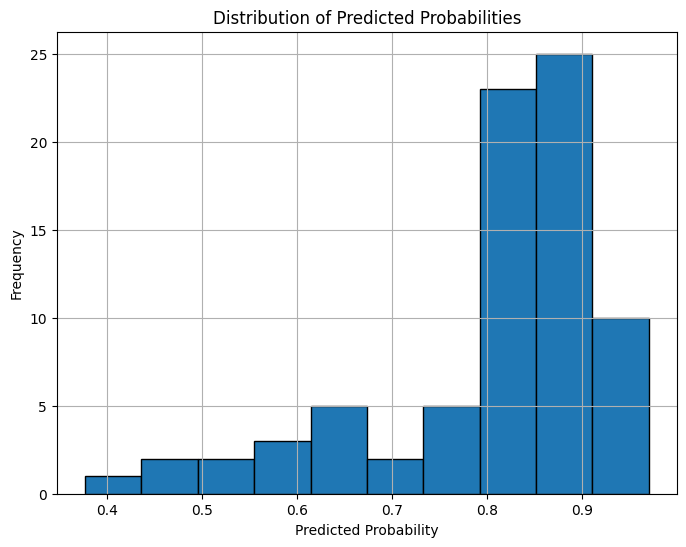

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=10, edgecolor='k')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid(True)
plt.show()

# **Discuss any patterns or insights you can derive from how the model makes predictions.**

This model or figure shows how the predicted probability work in the given dataset named onlinefood.csv . There are columns from dataset: longtitude and latitude which is the location of the customer. The faster they get the order the higher the positive feedback they will give.